In [14]:
!pip install gseapy
import gseapy as gp

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install import_ipynb
import import_ipynb

Defaulting to user installation because normal site-packages is not writeable


In [16]:
m = __import__("Copy_of_methods")

In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
def read_meta_data(dataset):
  url = 'https://osdr.nasa.gov/geode-py/ws/studies/OSD-' + str(dataset) + '/download?source=datamanager&file=OSD-' + dataset + '_metadata_OSD-' + dataset + '-ISA.zip'
  filename = dataset + '-meta.zip'
  urlretrieve(url, filename)
  !unzip -o {filename} > /dev/null
  df = pd.read_csv('s_OSD-' + dataset + '.txt', sep='\t', header=0)
  return df

In [19]:
meta=dict()
data = dict()

In [20]:
meta["RNA-SEQ"] = read_meta_data('514')

In [21]:
data["RNA-SEQ"] = pd.read_csv("./data/osd/GLDS-514_rna_seq_Normalized_Counts_GLbulkRNAseq.csv")

In [22]:
data["RNA-SEQ"].head()

,Unnamed: 0,Earth_M1,Earth_M2,Earth_M3,Earth_M4,Earth_F1,Earth_F2,Earth_F3,Earth_F4,SFug_M1,SFug_M2,SFug_M3,SFug_M4,SFug_F1,SFug_F2,SFug_F3,SFug_F4,SF1g_M1,SF1g_M2,SF1g_M3,SF1g_M4,SF1g_F1,SF1g_F2,SF1g_F3,SF1g_F4
0,FBgn0000003,268.326940,289.610821,307.904018,767.736468,363.014096,223.520592,237.296136,434.895552,617.512755,397.275093,494.114191,102.733961,540.691165,1227.123863,905.229891,414.117771,1487.063462,1557.208531,1377.858569,1120.621546,234.505650,395.502182,350.925252,450.650643
1,FBgn0000008,1211.805611,1163.875378,1055.794866,1091.560477,1066.283531,1169.359160,986.334465,1181.038372,1340.080214,1189.849152,1132.596904,1302.634134,972.791161,1163.510890,1248.041362,1258.849049,1173.876133,1119.218149,1097.009587,1118.483285,1319.362577,1321.783049,1167.903969,1464.003454
2,FBgn0000014,3.721252,6.748211,6.457626,0.000000,0.810243,4.260959,2.195389,2.844821,4.401245,6.346743,1.979916,0.000000,0.000000,3.030498,0.000000,0.000000,5.328744,0.000000,14.785793,3.172961,6.647281,0.000000,1.016876,2.664084
3,FBgn0000015,0.000000,1.572493,9.666983,1.898347,14.056209,2.461707,13.225248,7.404185,7.305775,5.718576,3.049767,2.560166,2.050603,4.914730,4.797240,9.462406,1.212701,2.167621,3.200357,3.612382,5.795728,2.208960,16.095113,27.152112
4,FBgn0000017,5792.651152,6025.273956,5669.638583,5646.796932,4716.378972,4988.898115,5071.258761,5147.098499,6702.973198,5317.186322,6582.326137,7718.806957,4004.071358,4965.857566,5206.478374,6145.212985,5983.464767,5956.888079,5813.034554,6157.063014,5643.030168,6117.758433,5151.717030,5756.307903


In [23]:
meta["RNA-SEQ"]["Sample Name"] = meta["RNA-SEQ"]["Sample Name"].str.replace('_', ' ', regex=False)
meta["RNA-SEQ"].head(meta["RNA-SEQ"].size)

,Source Name,Sample Name,Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[Strain],Term Source REF.1,Term Accession Number.1,Characteristics[Strain Source],Characteristics[Genotype],Term Source REF.2,Term Accession Number.2,Characteristics[Material Type],Term Source REF.3,Term Accession Number.3,Factor Value[Sex],Term Source REF.4,Term Accession Number.4,Characteristics[Generation],Characteristics[age],Unit,Term Source REF.5,Term Accession Number.5,Factor Value[Spaceflight],Term Source REF.6,Term Accession Number.6,Factor Value[Altered Gravity],Protocol REF,Parameter Value[habitat],Parameter Value[Age of F0 at Launch],Unit.1,Term Source REF.7,Term Accession Number.7,Parameter Value[Light Cycle],Parameter Value[light source],Protocol REF.1,Parameter Value[Sample Preservation Method],Term Source REF.8,Term Accession Number.8,Parameter Value[Sample Storage Temperature],Unit.2,Term Source REF.9,Term Accession Number.9,Comment[Experiment Start Date (DD/MM/YYYY)],Comment[Experiment End Date (DD/MM/YYYY)]
0,Earth Male 1,Earth M1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
1,Earth Male 2,Earth M2,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
2,Earth Male 3,Earth M3,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
3,Earth Male 4,Earth M4,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RN

In [24]:
# Import the MyGeneInfo module
mg = m.mygene.MyGeneInfo()

# Get the list of FlyBase gene IDs from your data
flybase_ids = list(data["RNA-SEQ"]['Unnamed: 0'])

# Query MyGeneInfo for FlyBase IDs
ginfo = mg.querymany(flybase_ids, scopes='flybase')

# Initialize lists to keep track of genes to drop and those with symbols
drop_list = []
hit_list = []

# Iterate through the query results
for g in ginfo:
    # Check if the gene has a 'symbol'; if not, add to the drop list
    if 'symbol' not in g:
        drop_list.append(g['query'])
    else:
        # Check if the gene symbol is already in the hit list; if not, add it
        if g['symbol'] not in hit_list:
            # Replace the FlyBase ID with its corresponding gene symbol
            data["RNA-SEQ"].loc[data["RNA-SEQ"]['Unnamed: 0'] == g['query'], 'Unnamed: 0'] = g['symbol']
            hit_list.append(g['symbol'])

# Print the shape of the RNA-seq data before filtering
print('RNA-seq data shape before: ', data["RNA-SEQ"].shape)

# Remove rows where the gene ID did not have a corresponding symbol
data["RNA-SEQ"] = data["RNA-SEQ"][~data["RNA-SEQ"]['Unnamed: 0'].isin(drop_list)]

# Print the shape of the RNA-seq data after filtering
print('RNA-seq data shape after: ', data["RNA-SEQ"].shape)


AttributeError: module 'Copy_of_methods' has no attribute 'mygene'

In [ ]:
def transpose_df(df, cur_index_col, new_index_col):
  df = df.set_index(cur_index_col).T
  df.reset_index(level=0, inplace=True)
  cols = [new_index_col] + list(df.columns)[1:]
  df.columns = cols
  return df

In [ ]:
rna_seq = transpose_df(data["RNA-SEQ"], cur_index_col='Unnamed: 0', new_index_col = 'sample')
# Safely replace underscores with spaces without using regex
rna_seq['sample'] = rna_seq['sample'].str.replace('_', ' ', regex=False)
rna_seq.head()

sample      LysC          lrRNA        srRNA     CR18275     CR18166  \
0  Earth M1  0.000000  359348.804993  1268.392693  340.991543  464.205838   
1  Earth M2  0.000000  331778.562238  1292.991162  321.483807  383.667905   
2  Earth M3  0.000000  404008.136746  1983.537746  325.706338  372.664446   
3  Earth M4  0.000000  318756.724806  1967.409030  312.300044  443.951303   
4  Earth F1  0.864284  418111.408304  1570.688711  277.762245  480.660576   

      CR4575    CR6900   CR17024    CR12842   CR10102     CR18217    CR7448  \
0   4.554500  1.666564  0.000000  61.520666  3.681458  264.154313  0.000000   
1   3.513026  1.634697  0.884966  80.371766  0.000000  279.632300  0.000000   
2  11.699553  8.825362  1.661926  57.053042  2.492160  276.063647  0.830376   
3   8.990986  5.309189  0.000000  59.949878  2.205287  306.023052  3.670669   
4   2.857367  4.506953  0.000000  62.589988  3.834710  289.201514  0.959108   

    CR10991     CR18228      Uros2       Acyp2     CG9593      CG4576  \
0  1.547353  461.283975  15.575320  325.248122  44.147996  732.075207   
1  1.497295  500.266635  25.584081  283.986151  40.703285  884.702195   
2  1.134851  574.611266  11.660633  309.828179  66.483314  839.415773   
3  1.335920  567.315150  20.755308  486.906082  52.991813  894.882723   
4  0.000000  570.812443  18.162833  340.172306  42.164094  827.655214   

       Arpc3A      Pbp45      CG4546        Hmt-1    CG9632    CG14877  \
0  445.332642  59.833945   96.872968  2090.828634  5.496752  11.975780   
1  456.192829  53.125652   86.922903  2019.473922  7.594312  12.403171   
2  411.529573  57.313981  127.750892  2046.535282  8.276116  14.114687   
3  422.910689  60.993772   88.552283  1932.548695  4.397104   7.338537   
4  479.225616  55.609290   75.850990  1938.022666  3.817826   2.877701   

        EndoU       Fbxl7    CG5478         blp       CG4287      CG5516  \
0  493.307931  350.708518  0.000000  524.527202  1417.102046  259.885343   
1  511.554607  355.602373  0.882921  524.004025  1266.851131  251.161423   
2  550.175719  349.463888  0.000000  619.642573  1355.002212  277.274576   
3  478.391112  332.635629  0.000000  691.415613  1374.396534  273.070539   
4  483.736064  358.800775  0.956567  577.293243  1428.136371  288.195338   

        Rbf2     GATAe      Jhbp5      CG5013      CG10185         sxe2  \
0  38.840048  6.728849  74.024667  120.935529  2535.258572  6931.814198   
1  30.211385  0.000000  47.591084  121.743189  2045.994689  6335.735937   
2  27.337897  0.000000  80.666258  136.597453  2223.349719  6636.365929   
3  29.148541  0.000000  58.916222  160.117863  1815.831787  5640.494755   
4  24.038728  0.961244  98.975716  110.887574  1784.960837  1890.428617   

      Mic26-27      CG5916        Fer2      CG8925      CG8927       CG6126  \
0  4232.383260  535.387072  132.229809  208.871807  102.937072  2131.858117   
1  4108.756676  428.990221  109.170123  210.512151  106.345112  2100.464105   
2  4372.531364  430.220079  115.252409  190.713717   68.157234  1868.533805   
3  4418.900096  452.469112  126.106218  240.256563   97.440816  1753.379771   
4  3706.718191  439.058829  110.346592  185.535104   83.485613  1527.743701   

       Zip89B    CG6901   CG17929   CG17930         pad     CG14879  \
0  350.883397  0.921768  1.844363  1.844214  271.157056   91.841723   
1  401.170121  0.000000  0.886659  0.886603  336.960825   81.028853   
2  454.371396  1.659972  0.829770  0.000000  293.962048  101.316998   
3  442.080036  0.000000  0.732444  6.592976  259.798495   98.149749   
4  516.827806  2.878788  1.919732  0.959817  258.777019  108.035641   

       CG10311      CG17931           js   CG10317        Fntb     CG14881  \
0  1345.250202  1435.432013   874.603194  4.922038  831.380603  231.189201   
1  1380.582321  1503.152189   728.490095  4.057332  780.836767  223.429304   
2  1472.840233  1531.207710   902.295526  5.522008  752.825736  223.878548   
3  1428.369053  1893.878500   858.644551  0.000000  840.17065

In [ ]:
meta["RNA-SEQ"][meta["RNA-SEQ"]['Sample Name']=="Earth F1"]['Factor Value[Spaceflight]'].values[0]

'Ground Control'

In [ ]:
# First let's create a conditions table for 'Factor Value: Spaceflight'. We'll assign 0 for ground control, 1 for SFug and 2 for SF1g
condition_dict=dict()
for sample in list(rna_seq['sample']):
    val=sample.split(" ")[0]
    if val == 'Earth':
        condition_dict[sample] = 0
    elif val == "SFug":
        condition_dict[sample] = 1
    elif val == "SF1g":
        condition_dict[sample] = 2
rna_seq["condition"] = rna_seq["sample"].map(condition_dict)
conditions=rna_seq[['sample', 'condition']]
conditions

,sample,condition
0,Earth M1,0
1,Earth M2,0
2,Earth M3,0
3,Earth M4,0
4,Earth F1,0
5,Earth F2,0
6,Earth F3,0
7,Earth F4,0
8,SFug M1,1
9,SFug M2,1


In [ ]:
# remove sample and condition from rna_seq dataframe
counts=rna_seq.drop(columns=['sample', 'condition']).reset_index(drop=True)
# check for non-numeric
counts.applymap(m.np.isreal)
# convert all cells to integers
counts=counts.astype(int)
counts.head()

LysC   lrRNA  srRNA  CR18275  CR18166  CR4575  CR6900  CR17024  CR12842  \
0     0  359348   1268      340      464       4       1        0       61   
1     0  331778   1292      321      383       3       1        0       80   
2     0  404008   1983      325      372      11       8        1       57   
3     0  318756   1967      312      443       8       5        0       59   
4     0  418111   1570      277      480       2       4        0       62   

   CR10102  CR18217  CR7448  CR10991  CR18228  Uros2  Acyp2  CG9593  CG4576  \
0        3      264       0        1      461     15    325      44     732   
1        0      279       0        1      500     25    283      40     884   
2        2      276       0        1      574     11    309      66     839   
3        2      306       3        1      567     20    486      52     894   
4        3      289       0        0      570     18    340      42     827   

   Arpc3A  Pbp45  CG4546  Hmt-1  CG9632  CG14877  EndoU  Fbxl7  CG5478  blp  \
0     445     59      96   2090       5       11    493    350       0  524   
1     456     53      86   2019       7       12    511    355       0  524   
2     411     57     127   2046       8       14    550    349       0  619   
3     422     60      88   1932       4        7    478    332       0  691   
4     479     55      75   1938       3        2    483    358       0  577   

   CG4287  CG5516  Rbf2  GATAe  Jhbp5  CG5013  CG10185  sxe2  Mic26-27  \
0    1417     259    38      6     74     120     2535  6931      4232   
1    1266     251    30      0     47     121     2045  6335      4108   
2    1355     277    27      0     80     136     2223  6636      4372   
3    1374     273    29      0     58     160     1815  5640      4418   
4    1428     288    24      0     98     110     1784  1890      3706   

   CG5916  Fer2  CG8925  CG8927  CG6126  Zip89B  CG6901  CG17929  CG17930  \
0     535   132     208     102    2131     350       0        1        1   
1     428   109     210     106    2100     401       0        0        0   
2     430   115     190      68    1868     454       1        0        0   
3     452   126     240      97    1753     442       0        0        6   
4     439   110     185      83    1527     516       2        1        0   

   pad  CG14879  CG10311  CG17931    js  CG10317  Fntb  CG14881  mRpS33   ema  \
0  271       91     1345     1435   874        4   831      231     336  1943   
1  336       81     1380     1503   728        4   780      223     293  1958   
2  293      101     1472     1531   902        5   752      223     345  1959   
3  259       98     1428     1893   858        0   840      275     490  1816   
4  258      108     1414     1635  1009        0   662      215     304  1918   

   Ttc1  CG14882  CG10405  CG14883  Gyc89Da  Gyc89Db  Sdhaf3  Der-2  Cad89D  \
0   546      230       19      430       89       80     203    862     172   
1   544      214        0      468       90       64     159    808     210   
2   528      195        0      444       89       48     182    844     226   
3   633      212        0      443       91       61     295    778     233   
4   551      251        3      434       94       93     202    873     318   

   Gr89a  CG14891  CG14903  CG14892  CG12783  CG17562  CG17560  Ccdc114  \
0      1        0      171       56        1        0        3       12   
1      0        0      163       96        6        3       10        6   
2      3        2      184       66        4        7       19        9   
3      0        0      297       73        0        6        9       14   
4      0        0      220       65        3        0        5        9   

   Arl6IP1  CG10324  CG14907  VhaM9.7-d  CG18622  EMC2B  EMC2A  CG3534   Irc  \
0     1449      234       53          0      391    626    278     680  5848   
1     1527      193       64          0      345    615    294     575  6193   
2     1362      207    

In [ ]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds.deseq2()
stats_results = m.DeseqStats(dds, contrast = ('condition', '0', '1'))
stats_results.summary()
res = stats_results.results_df

Fitting size factors...
... done in 0.01 seconds.

1909.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1909.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1909.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1909.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1909.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1910.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1910.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1910.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1910.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Fitting dispersions...
... done in 3.73 seconds.

Fitting dispersion trend curve...
... done i

Log2 fold change & Wald test p-value: condition 0 vs 1
                     baseMean  log2FoldChange     lfcSE      stat  \
LysC                 0.575098       -2.877752  2.735555 -1.051981   
lrRNA           544671.714029       -0.941421  0.193024 -4.877233   
srRNA             3894.703476       -1.484580  0.375808 -3.950374   
CR18275            296.362471        0.081550  0.119023  0.685163   
CR18166            397.343888        0.148226  0.105876  1.399987   
...                       ...             ...       ...       ...   
asRNA:CR46487        1.197838       -1.473547  1.281150 -1.150176   
lncRNA:CR46488     119.504231        0.267574  0.217331  1.231178   
lncRNA:CR46489      40.662309        1.946413  0.263866  7.376522   
lncRNA:CR46490       0.790759       -1.255736  2.245649 -0.559186   
dbf                 20.908780       -1.455099  1.843047 -0.789507   

                      pvalue          padj  
LysC            2.928083e-01           NaN  
lrRNA           1.075845e-

... done in 1.28 seconds.



In [ ]:
# extract results of the DESeq2 experiment where  padj < 0.05, and log2fc > 0
#res = res[res.baseMean >= 10000]
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0)]
gene_list=list(sigs.index)
gene_list

NameError: name 'res' is not defined

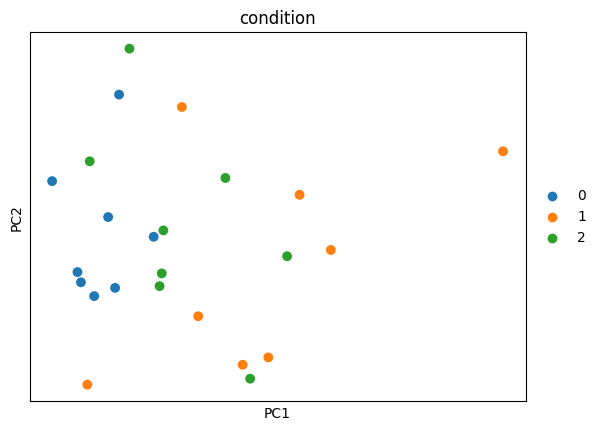

In [ ]:
# let's plot PCA
m.sc.tl.pca(dds)
m.sc.pl.pca(dds, color='condition', size=200)

In [ ]:
# first use the DESeq2 results to rank the genes based on the statistic 'stat' and convert genes to upper case
ranking = res[['stat']].dropna().sort_values('stat', ascending=False)
ranking_index=list(ranking.index)
ranking_index_upper=[x.upper() for x in ranking_index]
ranking.index=ranking_index_upper
ranking

,stat
CG34134,17.495617
T,9.882893
CG44195,8.798590
SDT,8.793930
FDL,8.625751
...,...
FS,-6.672740
CG14132,-6.786425
CG42361,-7.609026
CG45078,-8.713228


In [ ]:
# look at the names of the libraries that are available to use for PEA and GSEA
m.gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

# Enrichr Analysis w/Different Gene Sets
Can be found [here](https://maayanlab.cloud/FlyEnrichr/#stats)

In [ ]:
# Perform GO enrichment analysis with FlyBase genes using Enrichr
enr = m.gp.enrichr(
    gene_list=gene_list,  # List of FlyBase gene symbols
    gene_sets=[
        'GO_Molecular_Function_2018',
        'GO_Cellular_Component_2018',
        'GO_Biological_Process_2018'
    ],
    organism='fly',  # Set to 'fly' for Drosophila (FlyBase genes)
    outdir=None
)

enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,"hydrolase activity, acting on carbon-nitrogen ...",CG31373;CG6733;CG17109;serp;Cda4;bwa;verm;GLS,0.003107


In [ ]:
# use enrichR to get enriched pathways from KEGG (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['KEGG_2019' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value


In [ ]:
# use enrichR to get enriched pathways from WikiPathways_2018 (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['WikiPathways_2018' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value


In [ ]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['RNAi_Screens_from_GenomeRNAi_2017' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value


In [ ]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=['Allele_Phenotypes_from_FlyBase_2017' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

NameError: name 'gene_list' is not defined